interest rate indicates the 3-month interest rate between banks
duration indicates the time since the last contact was made with a given consumer.
The previous variable shows whether the any previous marketing campaign was successful with this customer. 
The  march and may are Boolean variables that account for when the call was made to the specific customer .
credit shows if the customer has enough credit to avoid defaulting.

We want to know whether the bank marketing strategy was successful by classification Ml models , the Target is column y

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [2]:
df = pd.read_csv('Bank_Data_Diploma.csv')

In [3]:
df

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0,1,0,0,117,no
1,0.767,0,0,2,1,274,yes
2,4.858,0,1,0,0,167,no
3,4.120,0,0,0,0,686,yes
4,4.856,0,1,0,0,157,no
...,...,...,...,...,...,...,...
735,4.963,0,0,0,0,458,yes
736,1.264,0,1,1,0,397,yes
737,1.281,0,1,0,0,34,no
738,0.739,0,0,2,0,233,no


In [4]:
df.duplicated().sum()

6

In [5]:
df.drop_duplicates(inplace =True )

In [6]:
df.isna().sum()

interest_rate    0
credit           0
march            0
may              0
previous         0
duration         0
y                0
dtype: int64

In [35]:
df['march'].unique()

array([0, 1], dtype=int64)

 ## Encode the target

In [8]:
def ask (x):
    if x == 'yes':
        return 1
    else:
        return 0

In [9]:
df['y']=df['y'].apply(ask)

In [10]:
df['y'].value_counts()

1    370
0    364
Name: y, dtype: int64

In [11]:
x = df.drop('y',axis= 1)
y = df['y']

In [12]:
from sklearn.model_selection import train_test_split,cross_validate

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2, random_state= 18)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scal= ['interest_rate','duration']

In [17]:
x_train[scal] = scaler.fit_transform(x_train[scal] )
x_test[scal] = scaler.transform(x_test[scal] )

In [18]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor 

In [19]:
knn = KNeighborsClassifier(n_neighbors = 12)

In [105]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [21]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score ,confusion_matrix,r2_score,recall_score,precision_score,f1_score

In [23]:
accuracy_score(y_train,y_pred_train)

0.8654173764906303

In [24]:
accuracy_score(y_test,y_pred_test)

0.891156462585034

## Evaluate the model

In [25]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [26]:
accuracy_score(y_test,y_pred_test) ,  accuracy_score(y_train,y_pred_train)

(0.891156462585034, 0.8654173764906303)

In [27]:
confusion_matrix(y_train,y_pred_train)

array([[244,  47],
       [ 32, 264]], dtype=int64)

In [28]:
confusion_matrix(y_test,y_pred_test)

array([[62, 11],
       [ 5, 69]], dtype=int64)

In [29]:
recall_score(y_test,y_pred_test) , recall_score(y_train,y_pred_train)

(0.9324324324324325, 0.8918918918918919)

In [36]:
precision_score(y_test,y_pred_test) , precision_score(y_train,y_pred_train)

(0.875, 0.8852459016393442)

## choose the best number of n_neighbors with best accuracy

In [50]:
test = []
train = []

In [53]:
for k in range (3,20,2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred_test)
    test.append(accuracy_test)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    train.append(accuracy_train)

In [48]:
rang =  list(range(3,20,2))

<AxesSubplot:>

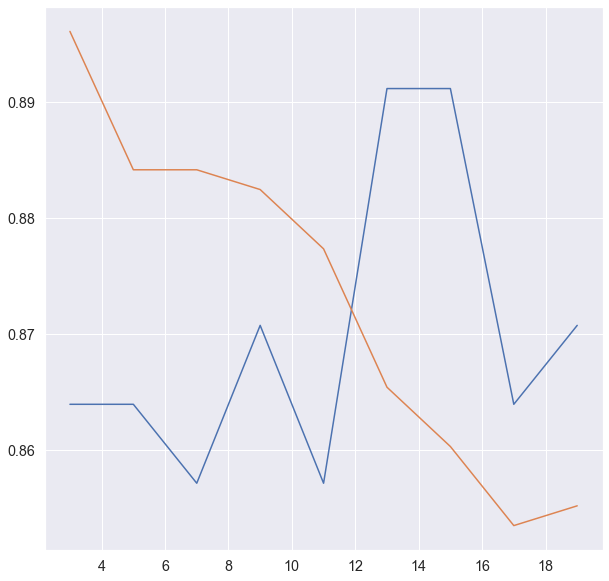

In [56]:
sns.lineplot(y =test,x=rang)
sns.lineplot(y =train,x=rang)

the ideal number of n_neighbors = 12

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(x_train,y_train)

In [ ]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [ ]:
f1_score(y_test,y_pred_test)

In [ ]:
f1_score(y_train,y_pred_train)

##                                      ---------------------------------------------------------------------------------------
Pipeline

In [57]:
from sklearn.pipeline import Pipeline

In [74]:
knn = KNeighborsClassifier(n_neighbors = 11)

In [75]:
list1  = []

In [76]:
list1.append(('scaler',StandardScaler()))

In [77]:
list1.append(('knn',KNeighborsClassifier(n_neighbors = 13)))

In [78]:
pipeline = Pipeline(steps = list1)

In [79]:
scores = cross_validate(pipeline,x,y ,scoring='accuracy',cv=5,return_train_score=True,)

In [80]:
scores["train_score"].mean()

0.863419439325986

In [91]:
scores["test_score"].mean()

0.8487652595284689

In [104]:
pipeline.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=13))])

In [98]:
pipeline.feature_names_in_

array(['interest_rate', 'credit', 'march', 'may', 'previous', 'duration'],
      dtype=object)

## According to those features !!!

is this strategy is successful 
[1.5,0,1,0,1,120]

In [101]:
pipeline.predict(np.array([[1.5,0,1,0,1,120]]))

array([1], dtype=int64)

 Yes !!! 